<a href="https://colab.research.google.com/github/k-arun007/Logical-Mining-Assisted-Heart-Disease-Prediction-Scheme-in-Association-with-Deep-Learning-Principle/blob/main/heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
dataset.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

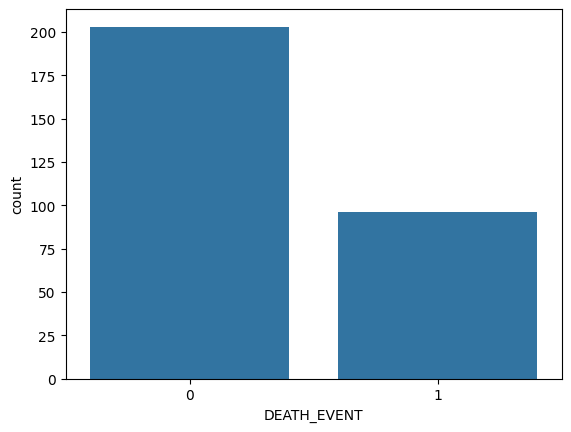

In [8]:
sns.countplot(x='DEATH_EVENT',data=dataset)

<Axes: >

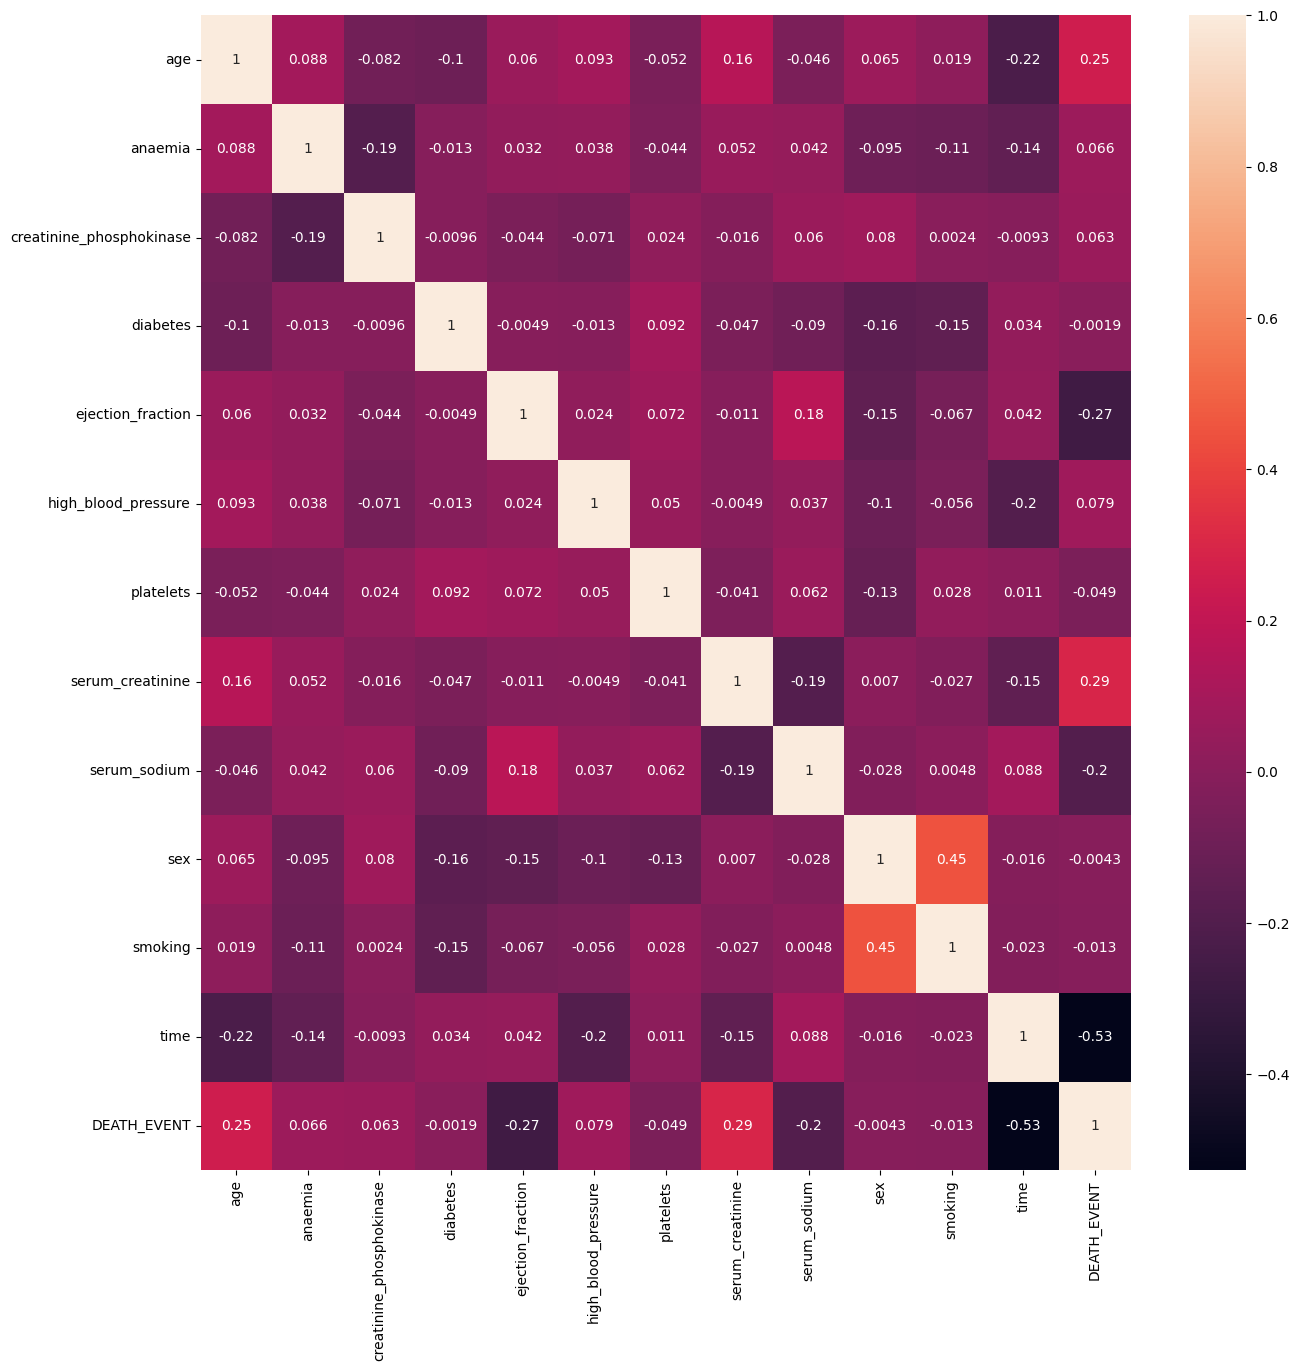

In [11]:
import seaborn as sns

corr_mat = dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat, annot=True)  # Corrected function name

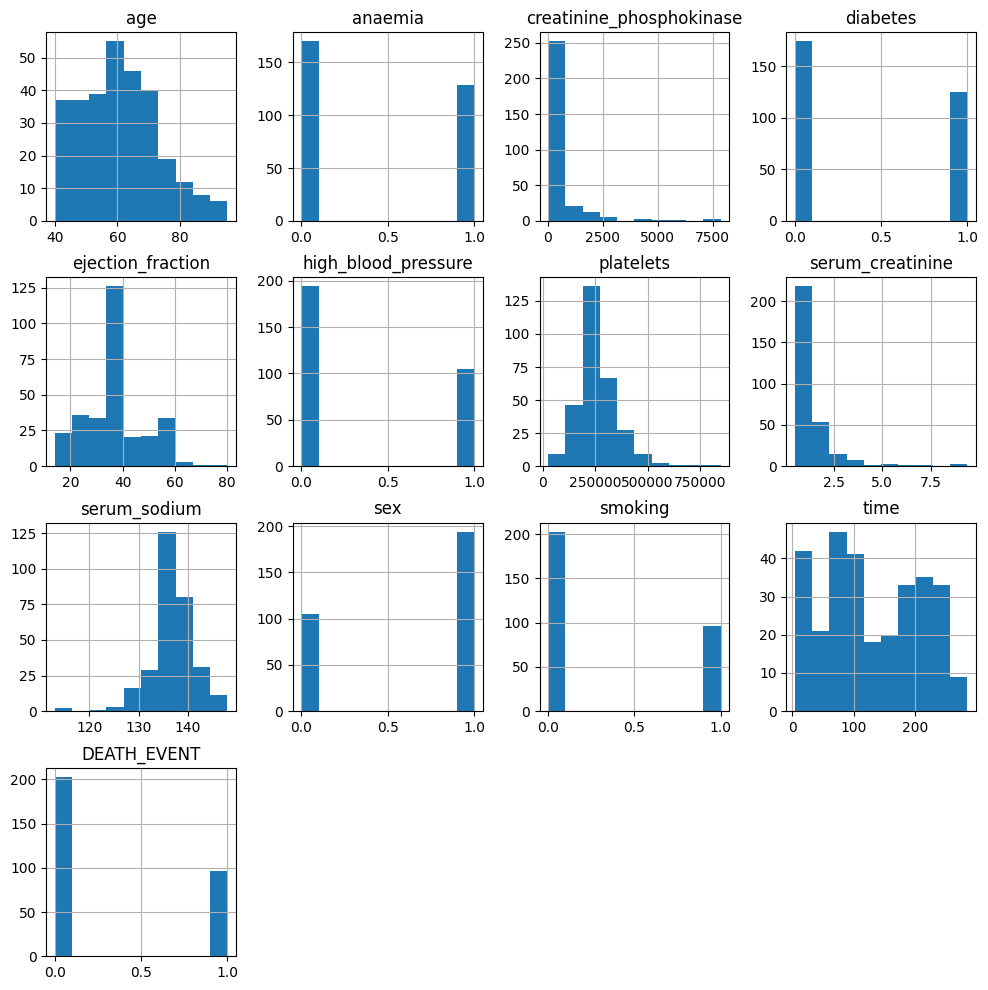

In [12]:
dataset.hist(figsize=(12,12))
plt.show()

In [13]:
dataset2=pd.get_dummies(dataset,columns=['sex','age','anaemia','diabetes','creatinine_phosphokinase','high_blood_pressure','platelets','serum_creatinine','serum_sodium','smoking','time','DEATH_EVENT'])

In [14]:
dataset2.head()

,ejection_fraction,sex_0,sex_1,age_40.0,age_41.0,age_42.0,age_43.0,age_44.0,age_45.0,age_46.0,...,time_256,time_257,time_258,time_270,time_271,time_278,time_280,time_285,DEATH_EVENT_0,DEATH_EVENT_1
0,20,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,38,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,20,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,20,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,20,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [18]:
cols=['sex_0',	'sex_1',	'age_40.0',	'age_41.0',	'age_42.0'	,'age_43.0',	'age_44.0'	,'age_45.0',	'age_46.0',	'time_256',	'time_257',	'time_258',	'time_270',	'time_271',	'time_278',	'time_280','time_285',	'DEATH_EVENT_0',	'DEATH_EVENT_1']

In [21]:
X = dataset2[cols]
Y = dataset2['DEATH_EVENT_0']  # Or Y = dataset2['DEATH_EVENT_1'] depending on your target variable encoding

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [23]:
x_train.head()


,sex_0,sex_1,age_40.0,age_41.0,age_42.0,age_43.0,age_44.0,age_45.0,age_46.0,time_256,time_257,time_258,time_270,time_271,time_278,time_280,time_285,DEATH_EVENT_0,DEATH_EVENT_1
225,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
78,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
66,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
296,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False
192,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [24]:
x_test.shape

(75, 19)

In [25]:
x_train.shape

(224, 19)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
x_train

array([[ 1.30337837, -1.30337837, -0.16590038, ..., -0.06696495,
         0.63937863, -0.63937863],
       [-0.76723691,  0.76723691, -0.16590038, ..., -0.06696495,
         0.63937863, -0.63937863],
       [ 1.30337837, -1.30337837, -0.16590038, ..., -0.06696495,
        -1.56401849,  1.56401849],
       ...,
       [-0.76723691,  0.76723691, -0.16590038, ..., -0.06696495,
         0.63937863, -0.63937863],
       [-0.76723691,  0.76723691, -0.16590038, ..., -0.06696495,
         0.63937863, -0.63937863],
       [-0.76723691,  0.76723691, -0.16590038, ..., -0.06696495,
         0.63937863, -0.63937863]])

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [29]:
y_pred = classifier.predict(x_test)

In [30]:
x_test

array([[-0.76723691,  0.76723691, -0.16590038, ..., -0.06696495,
         0.63937863, -0.63937863],
       [-0.76723691,  0.76723691, -0.16590038, ..., -0.06696495,
         0.63937863, -0.63937863],
       [-0.76723691,  0.76723691, -0.16590038, ..., -0.06696495,
        -1.56401849,  1.56401849],
       ...,
       [-0.76723691,  0.76723691, -0.16590038, ..., -0.06696495,
         0.63937863, -0.63937863],
       [-0.76723691,  0.76723691, -0.16590038, ..., -0.06696495,
         0.63937863, -0.63937863],
       [-0.76723691,  0.76723691, -0.16590038, ..., -0.06696495,
         0.63937863, -0.63937863]])

In [31]:
y_pred

array([ True,  True,  True, False,  True,  True, False,  True, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True, False,  True, False, False, False, False,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True])

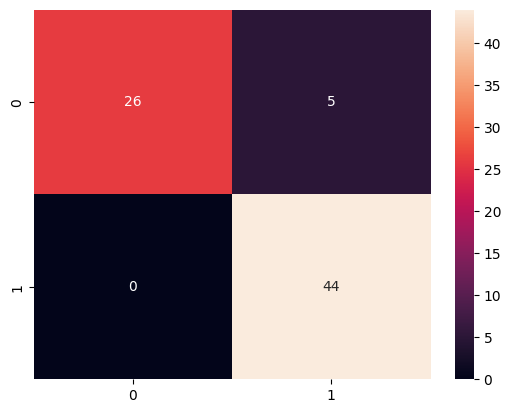

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [33]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In [34]:
import pickle
pickle.dump(classifier, open('model.pkl', 'wb'))
pickle.dump(sc, open('sc.pkl', 'wb'))